In [11]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="gaurav",
    database="TwitterDB",
    charset = 'utf8'
)

Airbnb Negative Tweets Monitor: 
  2020-03-18 20:52:03  @sam_48se @thirdrowtesla Its still a bargain to buy for long-term investors. $TSLA will grow a crazy amount.
  2020-03-18 20:55:42  RT @TESLAcharts: Elon Musk is a dangerous narcissistic psychopath. I believe I had that. $TSLAQ
  2020-03-18 21:05:11  RT @TheStreet: .@EricJhonsa: Tesla's $TSLA $2.3 Billion February Raise Helps Give It a Cushion During a Bleak Time https://t.co/pzGSKZOZYX


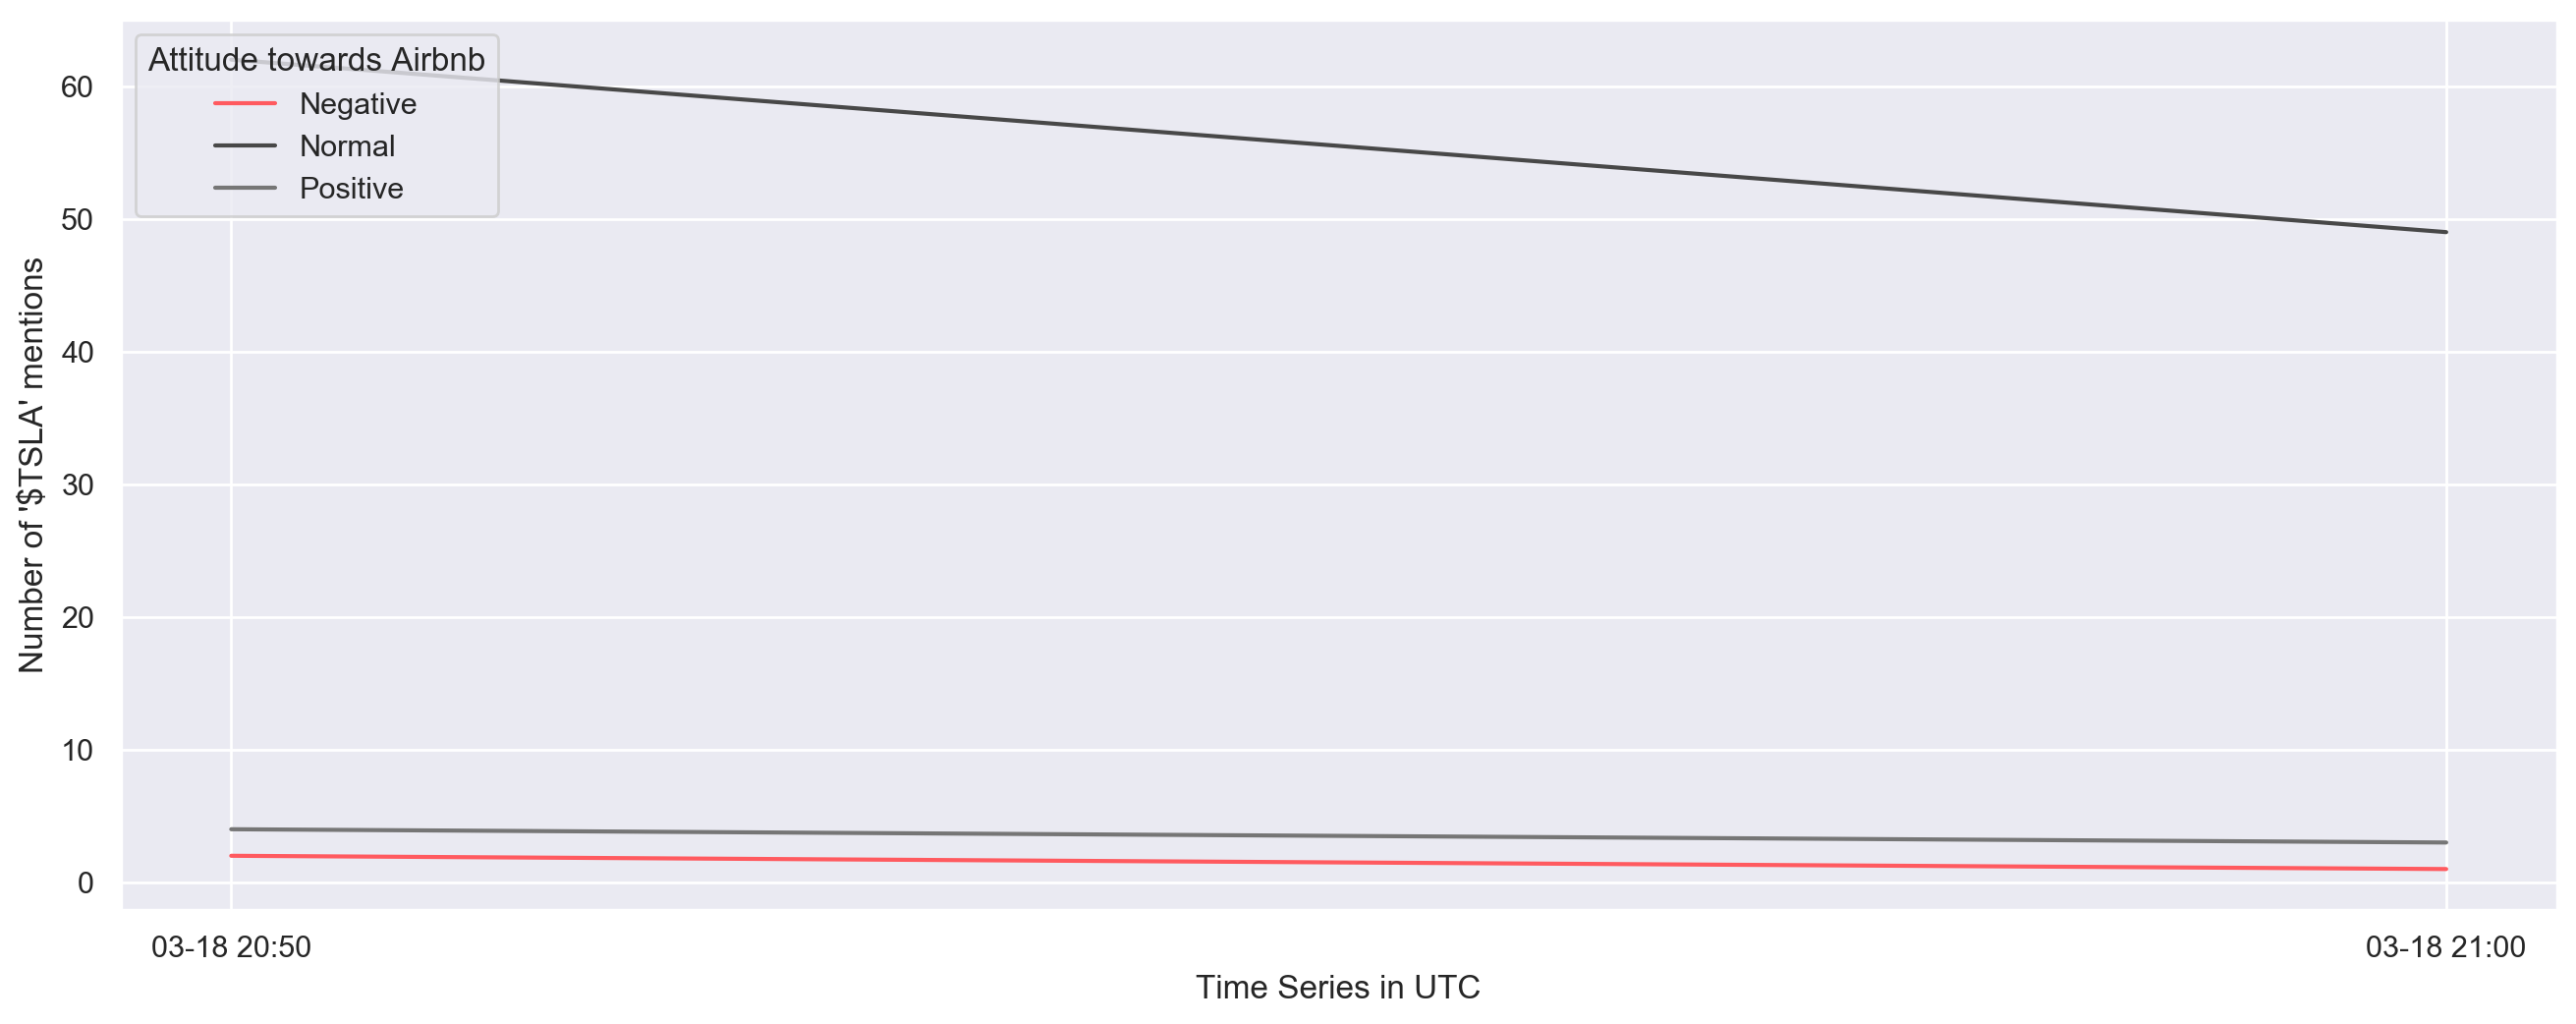

In [12]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Airbnb Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Airbnb', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [13]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States of America'